In [1]:
import random

from qutip import *
from qiskit.visualization import array_to_latex
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.optimize import curve_fit

## 1.D)

In [3]:
def P(t):
    tau = 1
    return 1/tau * np.exp(-t/tau)

### 1.D.1) list of exponential distribution values where $\tau = 1$

In [24]:
samples = np.random.exponential(1, 1000)
samples

array([2.47540013e+00, 3.87756461e-01, 8.83609546e-01, 5.70115172e-01,
       6.76793915e-01, 1.73457164e+00, 2.85625778e+00, 4.30320783e-01,
       8.61177793e-01, 1.03874373e+00, 6.86943424e-02, 4.98476839e-01,
       7.04159314e-01, 1.02663654e-01, 1.54902430e+00, 3.48929469e+00,
       1.87133542e+00, 3.88035149e+00, 1.00374327e+00, 1.76165115e+00,
       7.58613472e-01, 3.20901794e+00, 3.10467048e-01, 2.85622658e-01,
       4.74446759e-02, 1.82727913e+00, 1.21133824e+00, 2.27022001e+00,
       2.25555167e+00, 9.59208619e-01, 2.19369326e-01, 1.84850007e-01,
       3.00263350e+00, 4.91835042e-01, 6.41950902e-01, 7.89352999e-01,
       7.26564322e-01, 2.15268902e+00, 9.75831948e-01, 1.67316804e+00,
       6.62696027e-01, 2.21591293e+00, 2.79193810e+00, 4.43373935e-01,
       1.98224648e+00, 1.24254198e+00, 8.82640135e-01, 8.02800794e-01,
       3.85072564e+00, 2.85109132e-01, 1.00523902e+00, 2.62196023e+00,
       9.63390588e-01, 2.29528553e-01, 8.28382631e-02, 5.30200806e-02,
      

### 1.D.2) Mean of the list

In [25]:
print(np.mean(samples))

1.0169658369496997


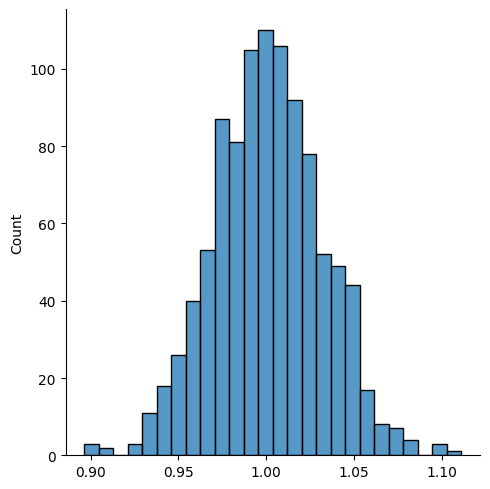

In [35]:
mean_dsit = [] 

for i in range(0,1000):
    samples = np.random.exponential(1, 1000)
    mean = np.mean(samples)

    mean_dsit.append(mean)

sns.displot(mean_dsit)
plt.show()


We can see that the above distribution is effectively Gaussian. This is a simulation of what our Likiness function would be for the $\tau_{e} = 1$

## 2)

### 2.A)

First, lets read these files into pandas dataframes like so:

In [8]:
state_temp_df = pd.read_csv('./climdiv_state_year.csv')
state_temp_df

,fips,year,temp,tempc
0,1,1895,61.641667,16.467593
1,1,1896,64.266667,17.925926
2,1,1897,64.191667,17.884259
3,1,1898,62.983333,17.212963
4,1,1899,63.100000,17.277778
...,...,...,...,...
5995,56,2015,44.158333,6.754630
5996,56,2016,43.908333,6.615741
5997,56,2017,43.200000,6.222222
5998,56,2018,42.408333,5.782407


In [9]:
state_num_df = pd.read_csv('./noaastate.txt')
state_num_df

,noaa_state_order,state
0,1,Alabama
1,2,Arizona
2,3,Arkansas
3,4,California
4,5,Colorado
5,6,Connecticut
6,7,Delaware
7,8,Florida
8,9,Georgia
9,10,Idaho


### 2.B)

Lets take a look at the year data. As we can see, this year data oscillates back and forth. This is due to the fact that we're looking at the years for all 50 states - which are all labeled nicely in our `state_num_df` object

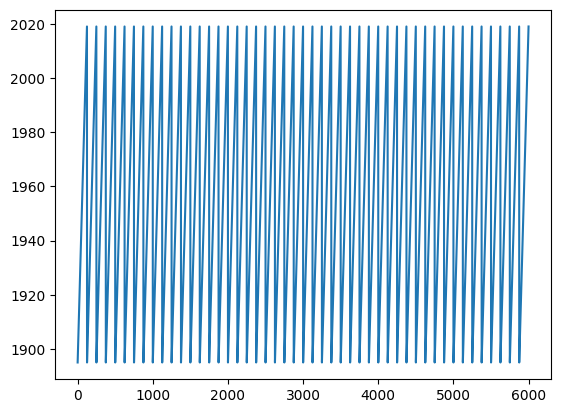

In [10]:
plt.plot(state_temp_df['year'])

### 2.C)

In [11]:
ca_temp_df = state_temp_df.loc[state_temp_df['fips'] == 4]
ca_temp_df

,fips,year,temp,tempc
125,4,1895,58.491667,14.717593
126,4,1896,59.983333,15.546296
127,4,1897,58.625000,14.791667
128,4,1898,59.016667,15.009259
129,4,1899,59.166667,15.092593
...,...,...,...,...
245,4,2015,61.750000,16.527778
246,4,2016,62.175000,16.763889
247,4,2017,63.033333,17.240741
248,4,2018,62.266667,16.814815


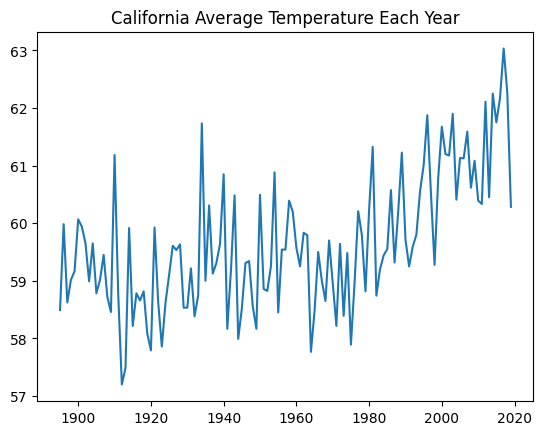

In [12]:
plt.plot(ca_temp_df['year'], ca_temp_df['temp'], label='California Temperature')
plt.title('California Average Temperature Each Year')
plt.show()

### 2.D)

In [13]:
ny_temp_df = state_temp_df.loc[state_temp_df['fips'] == state_num_df.loc[state_num_df['state'] == 'New York'].values[0][0]]
ny_temp_df

,fips,year,temp,tempc
2875,30,1895,38.991667,3.884259
2876,30,1896,39.433333,4.129630
2877,30,1897,39.850000,4.361111
2878,30,1898,39.841667,4.356481
2879,30,1899,38.100000,3.388889
...,...,...,...,...
2995,30,2015,44.858333,7.143519
2996,30,2016,44.625000,7.013889
2997,30,2017,43.175000,6.208333
2998,30,2018,41.275000,5.152778


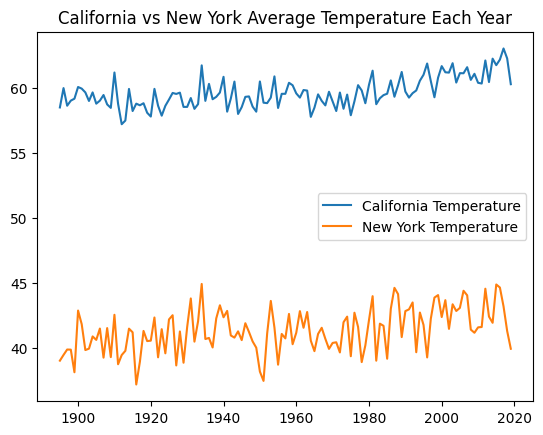

In [14]:
plt.plot(ca_temp_df['year'], ca_temp_df['temp'], label='California Temperature')
plt.plot(ny_temp_df['year'], ny_temp_df['temp'], label='New York Temperature')
plt.legend()
plt.title('California vs New York Average Temperature Each Year')
plt.show()

### 2.E)

In [15]:
total_mean_temp = state_temp_df['temp'].mean()
total_std_dev_temp = state_temp_df['temp'].std()
print(f"Total mean temperature is {total_mean_temp} and total standard deviation is {total_std_dev_temp}")

Total mean temperature is 51.61530138888888 and total standard deviation is 8.005998486465774


### 2.F)

In [16]:
ca_mean_temp = ca_temp_df["temp"].mean()
ca_std_dev_temp = ca_temp_df["temp"].std()
print(f"California's mean temperature is {ca_mean_temp} and standard deviation is {ca_std_dev_temp}")

ny_mean_temp = ny_temp_df["temp"].mean()
ny_std_dev_temp = ny_temp_df["temp"].std()
print(f"New York's mean temperature is {ny_mean_temp} and standard deviation is {ny_std_dev_temp}")

California's mean temperature is 59.65120000000001 and standard deviation is 1.1675177886175232
New York's mean temperature is 41.30486666666667 and standard deviation is 1.687916012706148


### 2.G)

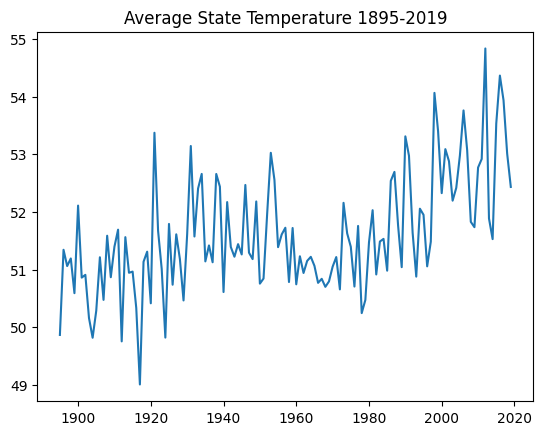

In [23]:
state_temp_1895_2019 = state_temp_df.loc[(state_temp_df['year'] >= 1895) & (state_temp_df['year'] <= 2019)]


state_mean_temps_1895_2019 = []
for year in range(1895, 2020):
    state_mean_temps_1895_2019.append(state_temp_1895_2019.loc[state_temp_1895_2019['year'] == year, 'temp'].mean())

plt.plot(range(1895, 2020), state_mean_temps_1895_2019)
plt.title('Average State Temperature 1895-2019')
plt.show()

### 2.H)

In [18]:
total_mean_temp_first30years = state_temp_df.loc[state_temp_df['year'] <= min(state_temp_df['year']) + 30 ]['temp'].mean()
total_std_dev_temp_first30years = state_temp_df.loc[state_temp_df['year'] <= min(state_temp_df['year']) + 30 ]['temp'].std()
print(f"The total state mean temperature of the first 30 years was {total_mean_temp_first30years}")
print(f"The total sttate std deviation temperature of the first 30 years was {total_std_dev_temp_first30years}")

state_temp_df.loc[state_temp_df['year'] <= min(state_temp_df['year']) + 30 ]

The total state mean temperature of the first 30 years was 50.92079413082437
The total sttate std deviation temperature of the first 30 years was 8.265002842426076


,fips,year,temp,tempc
0,1,1895,61.641667,16.467593
1,1,1896,64.266667,17.925926
2,1,1897,64.191667,17.884259
3,1,1898,62.983333,17.212963
4,1,1899,63.100000,17.277778
...,...,...,...,...
5901,56,1921,42.225000,5.680556
5902,56,1922,39.116667,3.953704
5903,56,1923,39.558333,4.199074
5904,56,1924,38.708333,3.726852


### 2.I)

In [19]:
total_mean_temp_last30years = state_temp_df.loc[state_temp_df['year'] >= max(state_temp_df['year']) - 30 ]['temp'].mean()
total_std_dev_temp_last30years = state_temp_df.loc[state_temp_df['year'] >= max(state_temp_df['year']) - 30 ]['temp'].std()
print(f"The total state mean temperature of the last 30 years was {total_mean_temp_last30years}")
print(f"The total sttate std deviation temperature of the last 30 years was {total_std_dev_temp_last30years}")

The total state mean temperature of the last 30 years was 52.62523521505377
The total sttate std deviation temperature of the last 30 years was 7.8177710875692545


### 2.J)

In [37]:
total_samples = 1488
std_err = total_mean_temp_last30years / np.sqrt(total_samples)

z_test = (total_mean_temp_first30years - total_mean_temp_last30years) / std_err
print(f"The z-test value is {z_test}")

The z-test value is -1.2493652136148254


From our Z-test table this corresponds to a one-sided p value of 0.1056. 

## 3)

### 3.A)

In [4]:
def V(t):
    omega = 2*np.pi
    return 1 * np.sin(omega * t) + 0.33

def V_sample(t):
    return V(t) + np.random.normal(0, 0.5, len(t))

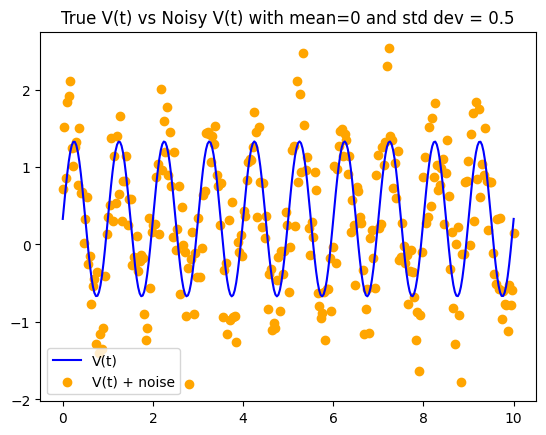

In [5]:
num_samples = 300
t = np.linspace(0, 10, num_samples)

plt.title("True V(t) vs Noisy V(t) with mean=0 and std dev = 0.5")
plt.plot(t, V(t), label='V(t)', color='blue')
plt.scatter(t, V_sample(t), label='V(t) + noise', color='orange')
plt.legend(loc="lower left")
plt.show()

### 3.B)

In [2]:
# Curve fitted V
def V_B(t, B):
    omega = 2*np.pi
    return 1 * np.sin(omega * t) + B

In [7]:
popt, pcov = curve_fit(V_B, t, V_sample(t))
print(f"The curve fitted B value is {popt[0]}")

The curve fitted B value is 0.3379440445533258


As we can see, this fitted B value is very close to our actual value of 0.33!

### 3.C)
scipy curve fit is able to guess B because its sampling the difference in noise, which is gaussian by definition. The curve fit is effectively running a $\chi^2$ test and minimizing the value to find the B value within a confidence interval. This works quite nicely for simple curves with gaussian-like noise, but breaks down for much more complicated curves and noise models.

### 3.D)

In [18]:
def V_fit(t, A, B, f):
    return A * np.sin(2 *np.pi * f * t) + B

In [22]:
popt, pcov = curve_fit(V_fit, t, V_sample(t), p0=[1, 0.33, 1])
print(f"The curve fitted A value is {popt[0]}")
print(f"The curve fitted B value is {popt[1]}")
print(f"The curve fitted f value is {popt[2]}\n")

print(f"Std dev of A is {np.sqrt(pcov[0][0])}")
print(f"Std dev of B is {np.sqrt(pcov[1][1])}")
print(f"Std dev of f is {np.sqrt(pcov[2][2])}\n")

# 1.96 comes from the interval of 95% of the gaussian distribution
print(f"Confidence interval for A is {popt[0] - 1.96 * np.sqrt(pcov[0][0])} to {popt[0] + 1.96 * np.sqrt(pcov[0][0])}")
print(f"Confidence interval for B is {popt[1] - 1.96 * np.sqrt(pcov[1][1])} to {popt[1] + 1.96 * np.sqrt(pcov[1][1])}")
print(f"Confidence interval for f is {popt[2] - 1.96 * np.sqrt(pcov[2][2])} to {popt[2] + 1.96 * np.sqrt(pcov[2][2])}")

The curve fitted A value is 1.070895736399502
The curve fitted B value is 0.2871152177451105
The curve fitted f value is 1.0008456943753927

Std dev of A is 0.039302918377173895
Std dev of B is 0.027731738540511867
Std dev of f is 0.001004864283289341

Confidence interval for A is 0.9938620163802412 to 1.1479294564187628
Confidence interval for B is 0.23276101020570725 to 0.34146942528451374
Confidence interval for f is 0.9988761603801456 to 1.0028152283706397


Taking a look at these curve fitted values, we can see that they're very close to our actual values within a reasonable confidence interval

### 3.E)

In [17]:
array_to_latex(pcov, prefix="\\text{Covariance Matrix: }", precision=10)

<IPython.core.display.Latex object>

All of the elements represent the corresponding covariance of our A,B, and f parameters respectively. When the values are greater than zero, then they are more correlated. When they are less than zero, they are more anti-correlated.

However, our values are really close to zero. This implies they aren't really correlated with eachother at all.

### 3.F)

In [23]:
def V_sample_phase(t):
    omega = 2*np.pi
    return 1 * np.sin(omega * t + np.random.normal(0, np.pi/10, len(t))) + 0.33


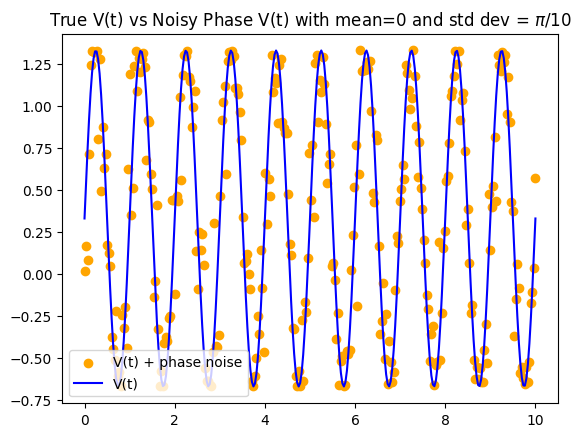

In [25]:
plt.title("True V(t) vs Noisy Phase V(t) with mean=0 and std dev = $\pi/10$")
plt.scatter(t, V_sample_phase(t), label='V(t) + phase noise', color='orange')
plt.plot(t, V(t), label='V(t)', color='blue')
plt.legend(loc="lower left")
plt.show()

In [27]:
popt, pcov = curve_fit(V_fit, t, V_sample_phase(t), p0=[1, 0.33, 1])
print(f"The curve fitted A value is {popt[0]}")
print(f"The curve fitted B value is {popt[1]}")
print(f"The curve fitted f value is {popt[2]}\n")

print(f"Std dev of A is {np.sqrt(pcov[0][0])}")
print(f"Std dev of B is {np.sqrt(pcov[1][1])}")
print(f"Std dev of f is {np.sqrt(pcov[2][2])}\n")

# 1.96 comes from the interval of 95% of the gaussian distribution
print(f"Confidence interval for A is {popt[0] - 1.96 * np.sqrt(pcov[0][0])} to {popt[0] + 1.96 * np.sqrt(pcov[0][0])}")
print(f"Confidence interval for B is {popt[1] - 1.96 * np.sqrt(pcov[1][1])} to {popt[1] + 1.96 * np.sqrt(pcov[1][1])}")
print(f"Confidence interval for f is {popt[2] - 1.96 * np.sqrt(pcov[2][2])} to {popt[2] + 1.96 * np.sqrt(pcov[2][2])}")

The curve fitted A value is 0.9415789508365513
The curve fitted B value is 0.33089072866190444
The curve fitted f value is 1.0000710571310947

Std dev of A is 0.01855656843575116
Std dev of B is 0.013098057069055364
Std dev of f is 0.0005403974830958944

Confidence interval for A is 0.905208076702479 to 0.9779498249706235
Confidence interval for B is 0.3052185368065559 to 0.35656292051725297
Confidence interval for f is 0.9990118780642268 to 1.0011302361979626


In [30]:
array_to_latex(pcov, prefix="\\text{Covariance Matrix: }", precision=10)

<IPython.core.display.Latex object>